In [1]:
import re
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import cleanOneCar

In [63]:
df = pandas.read_csv('bonbanh_v5_0712.csv')
df.head(3)

,title,date,location,year,used,kms,import,style,gearBox,fuelEngine,exterior,interior,seats,doors,motivated,url
0,Xe Toyota Veloz Cross Top 1.5 CVT 2022- 635 Triệu,Đăng ngày 6/12/2023. Xem 8 lượt,Mr. Dũng Điện thoại: Địa chỉ: Tây Hồ Hà N...,2022.0,Xe đã dùng,"21,000 Km",Nhập khẩu,SUV,Số tự động,Xăng 1.5 L,Ghi,Nhiều màu,7 chỗ,5 cửa,FWD - Dẫn động cầu trước,https://bonbanh.com/xe-toyota-veloz-cross-top-...
1,Xe VinFast VF9 Plus 2023- 1 Tỷ 260 Triệu,Đăng ngày 6/12/2023. Xem 10 lượt,Đại Việt Car Điện thoại: 0982 348 912 Địa ...,2023.0,Xe đã dùng,"45,000 Km",Lắp ráp trong nước,SUV,Số tự động,Điện 0.2 L,Xanh,Nâu,6 chỗ,5 cửa,AWD - 4 bánh toàn thời gian,https://bonbanh.com/xe-vinfast-vf9-plus-2023-5...
2,Xe Lexus ES 250 2020- 1 Tỷ 759 Triệu,Đăng ngày 6/12/2023. Xem 11 lượt,HĐC Auto Điện thoại: 0986 795 555 Hoặc 0...,2020.0,Xe đã dùng,"30,000 Km",Nhập khẩu,Sedan,Số tự động,Xăng 2.5 L,Xanh,Nâu,5 chỗ,4 cửa,FWD - Dẫn động cầu trước,https://bonbanh.com/xe-lexus-es-250-2020-5297638


In [64]:
df = df[~df['title'].isnull()]
df = df.drop(columns=['date', 'url', 'interior', 'exterior']) # không cần thiết

In [66]:

#gearBox
df['gearBox'][df['gearBox'] == '-'] = df['gearBox'][df['style'] == 'SUV'].mode().values[0]
# because value '-' in gearBox just appear when style == SUV

#motivated
df['motivated'][df['motivated'] == '-'] = df['motivated'].mode().values[0]

# fuelEngine
df['fuelEngine'][df['fuelEngine'] == '-'] = df['fuelEngine'].mode().values[0]

# location
df['location'][df['location'] == 'Thông tin liên hệ không có hiệu lực !'] = df['location'].mode().values[0]

# doors
df['doors'][(df['doors'] == '') | (df['doors'] == '0 cửa')] = df['doors'].mode().values[0]

#seats
df['seats'][(df['seats'] == '') | (df['seats'] == '0 chỗ')] = df['seats'].mode().values[0]

C:\Users\tranh\AppData\Local\Temp\ipykernel_25148\2075462011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gearBox'][df['gearBox'] == '-'] = df['gearBox'][df['style'] == 'SUV'].mode().values[0]
C:\Users\tranh\AppData\Local\Temp\ipykernel_25148\2075462011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['motivated'][df['motivated'] == '-'] = df['motivated'].mode().values[0]
C:\Users\tranh\AppData\Local\Temp\ipykernel_25148\2075462011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [67]:
#convert df['title']
df = pandas.concat([df, df['title'].apply(cleanOneCar.convert_title).apply(pandas.Series)], axis=1)
df = df.drop(columns='title')

# convert brand, model
df = pandas.concat(
    [df, df['brand'].apply(cleanOneCar.convert_brand).apply(pandas.Series)], axis=1
)
df = df.drop(columns=['model', 'brand'])

In [68]:
#convert location
df = pandas.concat(
    [df, df['location'].apply(cleanOneCar.convert_location).apply(pandas.Series)],
    axis = 1
)
df = df.drop(columns=['location'])

In [69]:
df_style = df[['style', 'price']]
df_style

,style,price
0,SUV,635
1,SUV,1260
2,Sedan,1759
3,SUV,695
4,SUV,533
...,...,...
14995,Sedan,488
14996,Sedan,1150
14997,Bán tải / Pickup,445
14998,Sedan,420


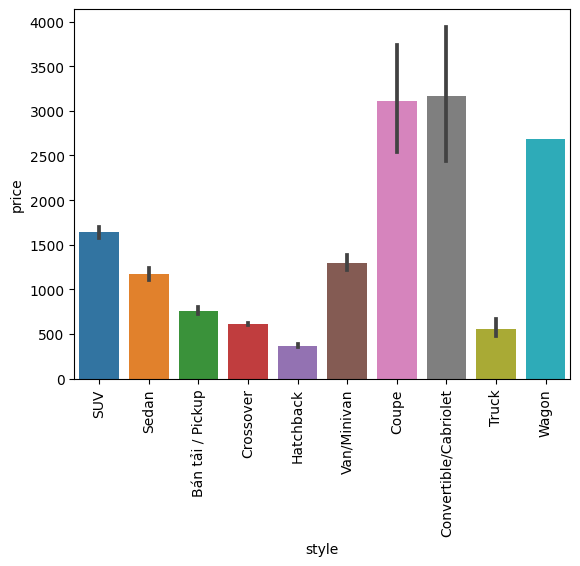

In [72]:
# tần suất của các kiểu dáng xe
plt.Figure(figsize=(10,2))
sns.barplot(x='style', y='price', data=df_style)
plt.xticks(rotation=90)
plt.show()

In [30]:
df['market'] = df['market'].replace('', df['market'].mode().values[0])

In [62]:
df.columns

Index(['year', 'used', 'kms', 'import', 'gearBox', 'fuelEngine', 'seats',
       'doors', 'motivated', 'price', 'brand_over10Bs', 'brand_5to10Bs',
       'brand_2to5Bs', 'brand_1to2Bs', 'brand_under1B', 'market',
       'HCM/HN market', 'other market', 'Van/Minivan', 'SUV', 'Hatchback',
       'Bán tải / Pickup', 'Sedan', 'Crossover', 'Coupe',
       'Convertible/Cabriolet', 'Truck', 'Wagon'],
      dtype='object')

In [24]:
df_tmp = df[['market', 'price']][df['price'] > 5000]
df_tmp

,market,price
29,Hà Nội,15800
39,HCM,5688
218,Hà Nội,8500
233,Hà Nội,8500
238,Hà Nội,8500
...,...,...
14917,Hà Nội,9000
14933,Hà Nội,9968
14934,Hà Nội,5180
14935,Hà Nội,5900


In [31]:
# phân phôi số lượng xe bán ở các tỉnh thành
df_tmp_count = df.groupby('market').size().reset_index(name='Count')
df_tmp_count

,market,Count
0,An Giang,3
1,Bình Dương,244
2,Bình Phước,1
3,Bình Thuận,14
4,Bình Định,7
5,Bắc Giang,37
6,Bắc Ninh,88
7,Cần Thơ,81
8,Gia Lai,63
9,HCM,3224


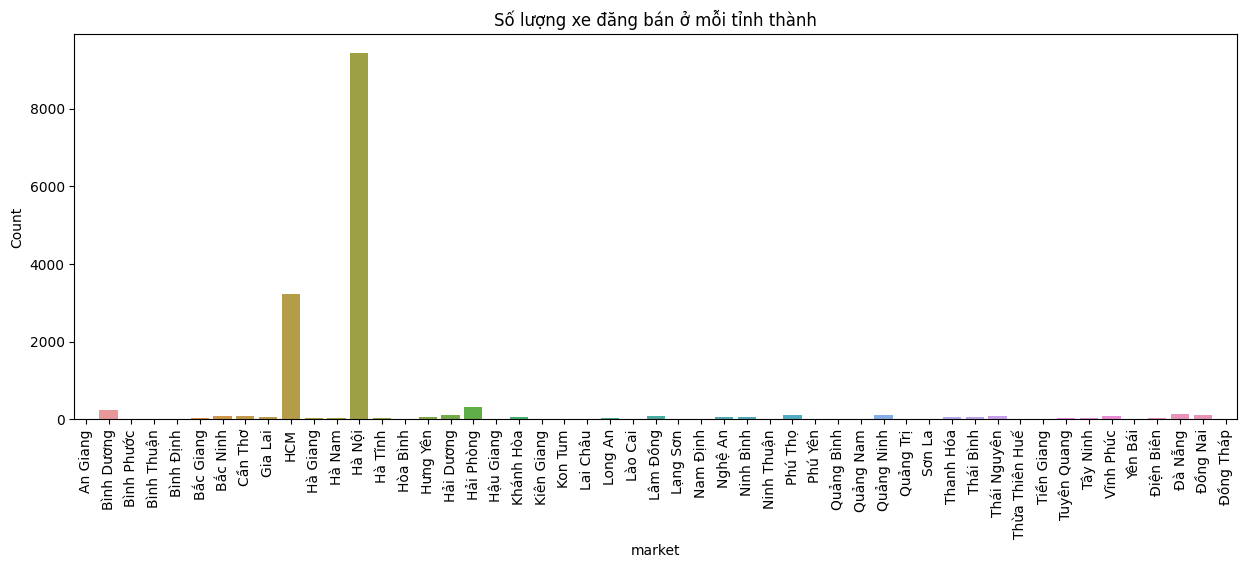

In [56]:
# phân phôi số lượng xe bán ở các tỉnh thành
plt.figure(figsize=(15, 5))
sns.barplot(x='market', y='Count', data=df_tmp_count)
plt.title('Số lượng xe đăng bán ở mỗi tỉnh thành')
plt.xticks(rotation=90)

plt.show()

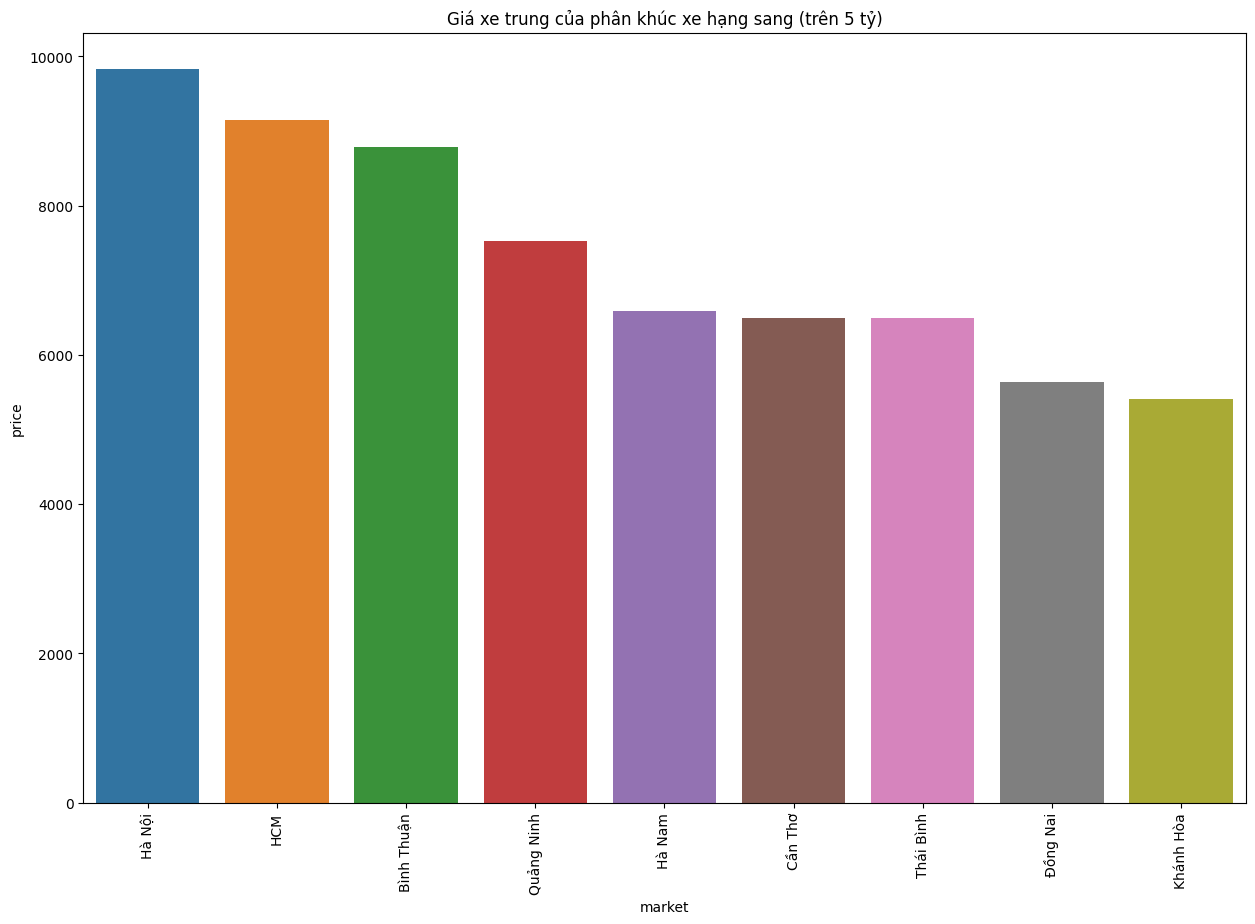

In [73]:
df_tmp_avg = df_tmp.groupby('market')['price'].mean().reset_index()
df_tmp_avg = df_tmp_avg.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='market', y='price', data=df_tmp_avg)
plt.xticks(rotation=90)
plt.title("Giá xe trung của phân khúc xe hạng sang (trên 5 tỷ)")
plt.show()

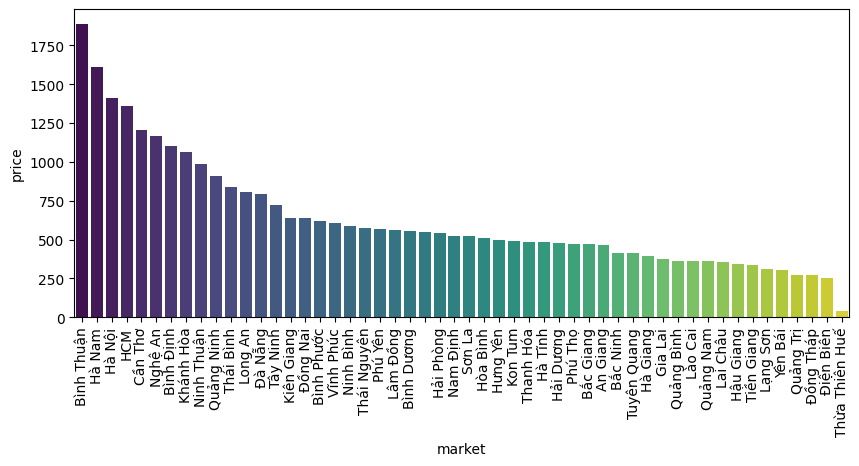

In [12]:
# Biểu đồ phân phối mức giá của các thị trường (tỉnh thành)
avg_prices = df.groupby('market')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x='market', y='price', data=avg_prices, palette='viridis')
plt.xticks(rotation=90)
plt.show()